In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_csv('transactions.csv')
df.head()

,transaction_id,date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,7:06:11 AM,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,7:08:56 AM,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,7:14:04 AM,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,7:20:24 AM,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,7:22:41 AM,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [139]:
df.ndim

2

In [140]:
df.shape

(149116, 11)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   date              149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [142]:
df.drop('product_detail',axis = 1, inplace = True)
df.index = list(range(1,df.shape[0]+1))

In [143]:
df.isna().sum()/len(df)*100

,0
transaction_id,0.0
date,0.0
transaction_time,0.0
transaction_qty,0.0
store_id,0.0
store_location,0.0
product_id,0.0
unit_price,0.0
product_category,0.0
product_type,0.0


In [144]:
df.duplicated().sum()

np.int64(0)

In [145]:
df['Total_Price'] = df['transaction_qty'] * df['unit_price']

In [146]:
customer_spending = df.groupby("transaction_id")["Total_Price"].sum().reset_index()
customer_spending["spending_segment"] = pd.qcut(customer_spending["Total_Price"], q=3, labels=["Low", "Medium", "High"])
df = df.merge(customer_spending[["transaction_id", "spending_segment"]], on="transaction_id", how="left")
df.head()

,transaction_id,date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,Total_Price,spending_segment
0,1,01-01-2023,7:06:11 AM,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,6.0,High
1,2,01-01-2023,7:08:56 AM,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,6.2,High
2,3,01-01-2023,7:14:04 AM,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,9.0,High
3,4,01-01-2023,7:20:24 AM,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,2.0,Low
4,5,01-01-2023,7:22:41 AM,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,6.2,High


In [147]:
pd.crosstab(df['transaction_id'], df['spending_segment']).sum()

,0
spending_segment,
Low,55164
Medium,50719
High,43233


In [148]:
df.index = list(range(1,df.shape[0]+1))

In [149]:
df

,transaction_id,date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,Total_Price,spending_segment
1,1,01-01-2023,7:06:11 AM,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,6.00,High
2,2,01-01-2023,7:08:56 AM,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,6.20,High
3,3,01-01-2023,7:14:04 AM,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,9.00,High
4,4,01-01-2023,7:20:24 AM,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,2.00,Low
5,5,01-01-2023,7:22:41 AM,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,6.20,High
...,...,...,...,...,...,...,...,...,...,...,...,...
149112,149452,30-06-2023,8:18:41 PM,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,5.00,Medium
149113,149453,30-06-2023,8:25:10 PM,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,6.00,High
149114,149454,30-06-2023,8:31:34 PM,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,3.00,Low
149115,149455,30-06-2023,8:57:19 PM,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,3.75,Medium


**Descriptive Statstics**

In [150]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price,Total_Price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219,4.686367
std,43153.600016,0.542509,2.074241,17.930020,2.658723,4.227099
min,1.000000,1.000000,3.000000,1.000000,0.800000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000,3.000000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000,3.750000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000,6.000000
max,149456.000000,8.000000,8.000000,87.000000,45.000000,360.000000


- The median quantity sold per transaction was 1 item, with a maximum of 8 items purchased in a single order.
- Store IDs ranged from 3 to 8, with a median of 5, indicating Store 5 may have had moderate to high activity.
- Product IDs spanned 1 to 87, with the majority falling between 47 and 60, suggesting a central product cluster.
- The average unit price was ₹3.38, most commonly between ₹2.50 and ₹3.75, while the highest-priced item reached ₹45.00.
- Mean total transaction price was ₹4.69, with most sales totaling between ₹3 and ₹6; the highest spend recorded was ₹360.00.


In [151]:
df.select_dtypes(include = 'object').describe()

,date,transaction_time,store_location,product_category,product_type
count,149116,149116,149116,149116,149116
unique,181,25762,3,9,29
top,19-06-2023,9:31:15 AM,Hell's Kitchen,Coffee,Brewed Chai tea
freq,1343,41,50735,58416,17183


**Descriptive Statistics**

1. June 19, 2023 marked the busiest day, recording 1,343 transactions.
2. The most frequent transaction time was 9:31:15 AM, logged 41 times.
3.  Hell's Kitchen stood out as the top-performing location, handling 50,735 transactions.
4.  Among product categories, Coffee emerged as the most popular, with approximately 21,589 units sold.
5.  The Brewed Chai Tea topped the list as the most commonly purchased item by customers at the coffee store


***Sales Performance***

In [152]:
df["transaction_date"] = pd.to_datetime(df["date"], errors='coerce')
df["weekday"] = df["transaction_date"].dt.day_name()

weekday_sales = df.groupby("weekday")["Total_Price"].sum().reset_index()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales = weekday_sales.set_index("weekday").reindex(weekday_order).reset_index()

In [153]:
df['hour'] = df['transaction_time']
hourly_sales = df.groupby('hour')['Total_Price'].sum().reset_index()
hourly_sales.index = list(range(1,hourly_sales.shape[0]+1))
hourly_sales

,hour,Total_Price
1,10:00:01 AM,44.05
2,10:00:02 AM,22.50
3,10:00:03 AM,15.10
4,10:00:04 AM,7.50
5,10:00:05 AM,36.00
...,...,...
25758,9:59:52 AM,24.70
25759,9:59:54 AM,14.00
25760,9:59:55 AM,23.25
25761,9:59:56 AM,5.00


In [154]:
hourly_sales = df.groupby("hour")["Total_Price"].sum().reset_index()

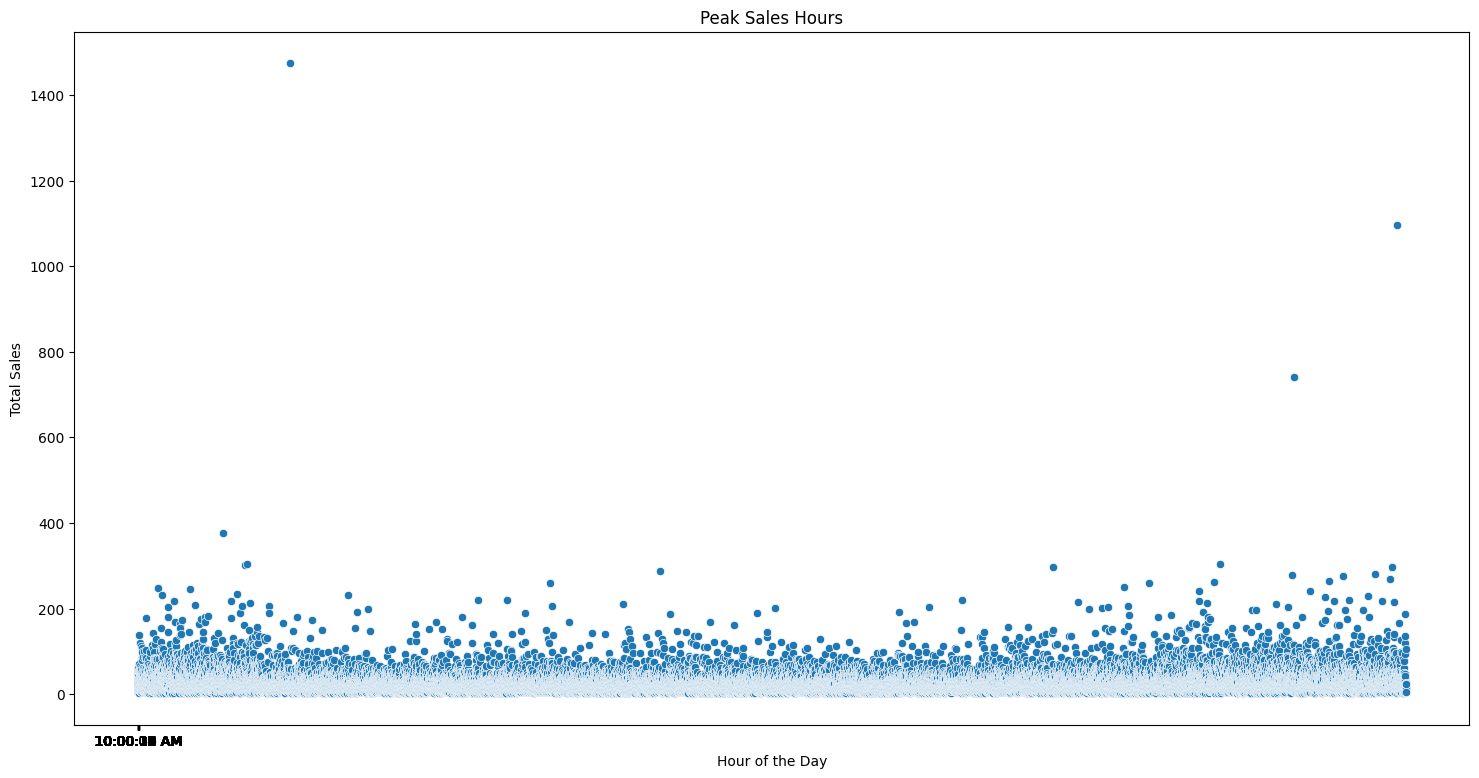

In [155]:
# Plot of peak sales hours
plt.figure(figsize=(18, 9))
sns.scatterplot(x="hour", y="Total_Price", data=hourly_sales, palette="Blues")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.title("Peak Sales Hours")
plt.xticks(range(0, 24))
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

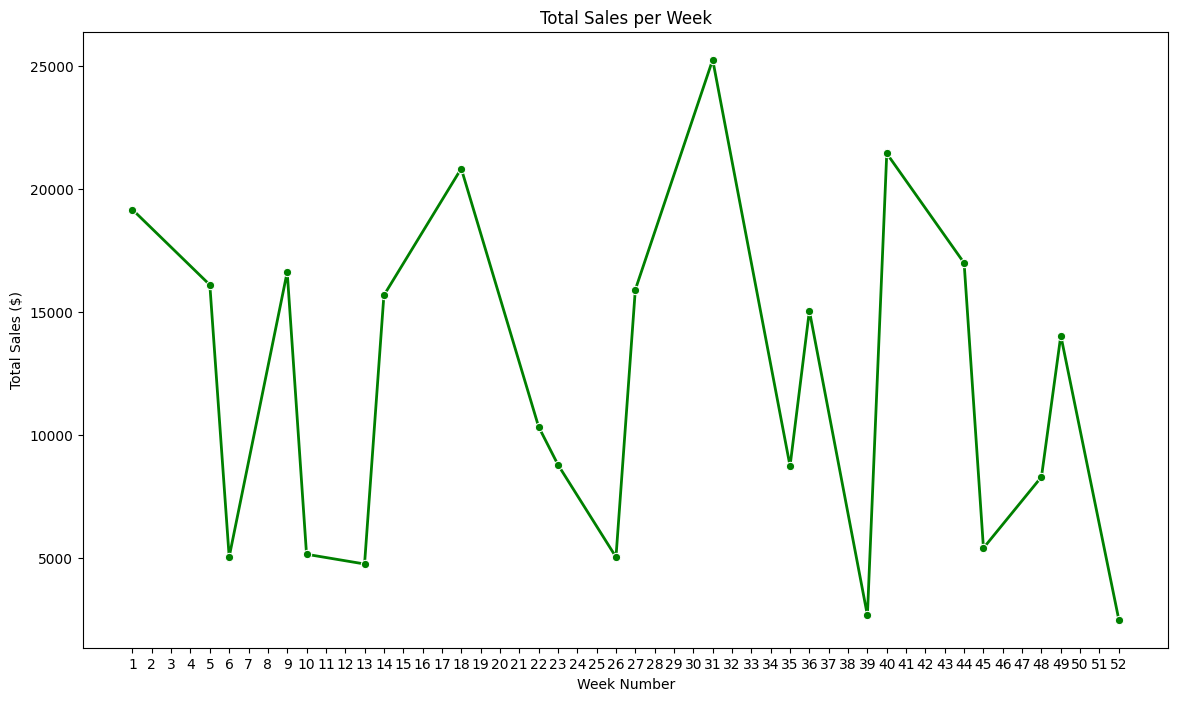

In [156]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"], errors='coerce')
df["week_number"] = df["transaction_date"].dt.isocalendar().week

weekly_sales = df.groupby("week_number")["Total_Price"].sum().reset_index()

# Plot weekly sales
plt.figure(figsize=(14, 8))
sns.lineplot(data=weekly_sales, x="week_number", y="Total_Price", marker="o", linewidth=2, color="green")
plt.xlabel("Week Number")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales per Week")
plt.xticks(range(weekly_sales["week_number"].min(), weekly_sales["week_number"].max() + 1))
plt.grid(False)
plt.show()

In [157]:
weekly_sales.sort_values(by ='Total_Price' ,ascending = False)

,week_number,Total_Price
12,31,25253.08
16,40,21446.56
7,18,20833.70
0,1,19164.90
17,44,16997.06
3,9,16631.15
1,5,16107.65
11,27,15912.10
6,14,15684.05
14,36,15057.01


In [158]:
weekly_sales.sort_values(by ='Total_Price' ,ascending = False)

,week_number,Total_Price
12,31,25253.08
16,40,21446.56
7,18,20833.70
0,1,19164.90
17,44,16997.06
3,9,16631.15
1,5,16107.65
11,27,15912.10
6,14,15684.05
14,36,15057.01


In [159]:
max_total_price = weekly_sales['Total_Price'].max()
max_week = weekly_sales[weekly_sales['Total_Price'] == max_total_price]['week_number'].values[0]
print("Week with the highest total sales:", max_week)
print('Total Sales:',max_total_price)
print('\t')
min_total_price = weekly_sales['Total_Price'].min()
min_week = weekly_sales[weekly_sales['Total_Price'] == min_total_price]['week_number'].values[0]
print("Week with the lowest total sales:", min_week)
print('Total Sales:',min_total_price)

Week with the highest total sales: 31
Total Sales: 25253.08
	
Week with the lowest total sales: 52
Total Sales: 2508.2


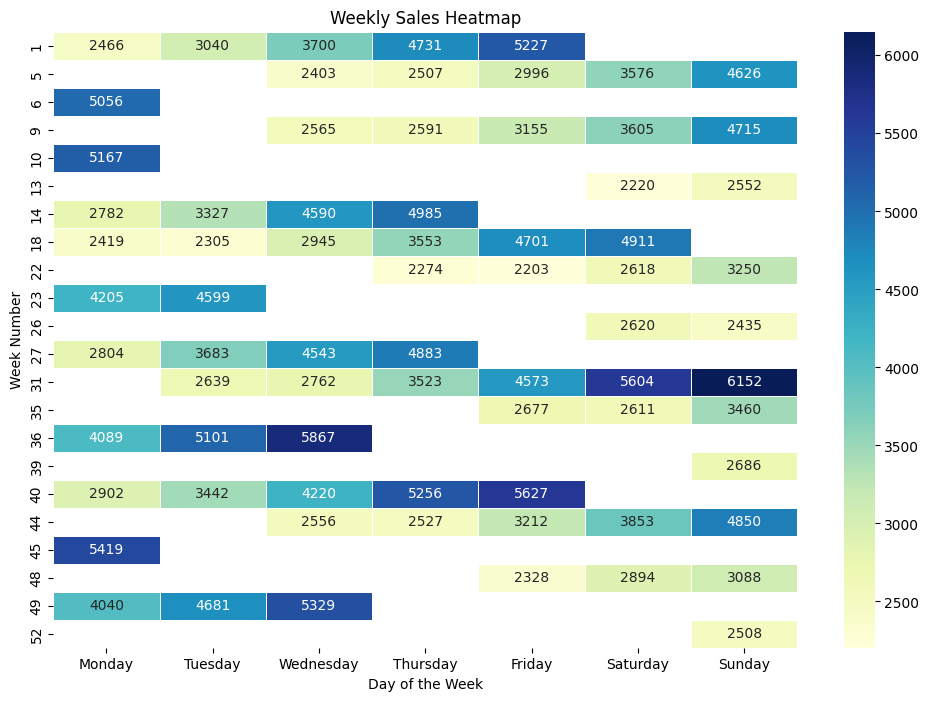

In [160]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"], errors='coerce')

df["week_number"] = df["transaction_date"].dt.isocalendar().week
df["weekday"] = df["transaction_date"].dt.day_name()

weekly_sales_heatmap = df.pivot_table(values="Total_Price", index="week_number", columns="weekday", aggfunc="sum")

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales_heatmap = weekly_sales_heatmap[weekday_order]

plt.figure(figsize=(12, 8))
sns.heatmap(weekly_sales_heatmap, cmap="YlGnBu", linewidths= 0.5, annot=True, fmt=".0f")
plt.xlabel("Day of the Week")
plt.ylabel("Week Number")
plt.title("Weekly Sales Heatmap")
plt.show()

In [161]:
weekly_sales_heatmap.sum()

,0
weekday,
Monday,41348.12
Tuesday,32816.16
Wednesday,41480.29
Thursday,36830.93
Friday,36698.37
Saturday,34511.45
Sunday,40320.35


 The Products with the highest and lowest sales revenue

In [162]:
Product_sales = df.groupby('product_category')['Total_Price'].sum().sort_values(ascending = False)
Product_sales.reset_index()

,product_category,Total_Price
0,Coffee,269952.45
1,Tea,196405.95
2,Bakery,82315.64
3,Drinking Chocolate,72416.00
4,Coffee beans,40085.25
5,Branded,13607.00
6,Loose Tea,11213.60
7,Flavours,8408.80
8,Packaged Chocolate,4407.64


**Sales Performance seasonal wise**

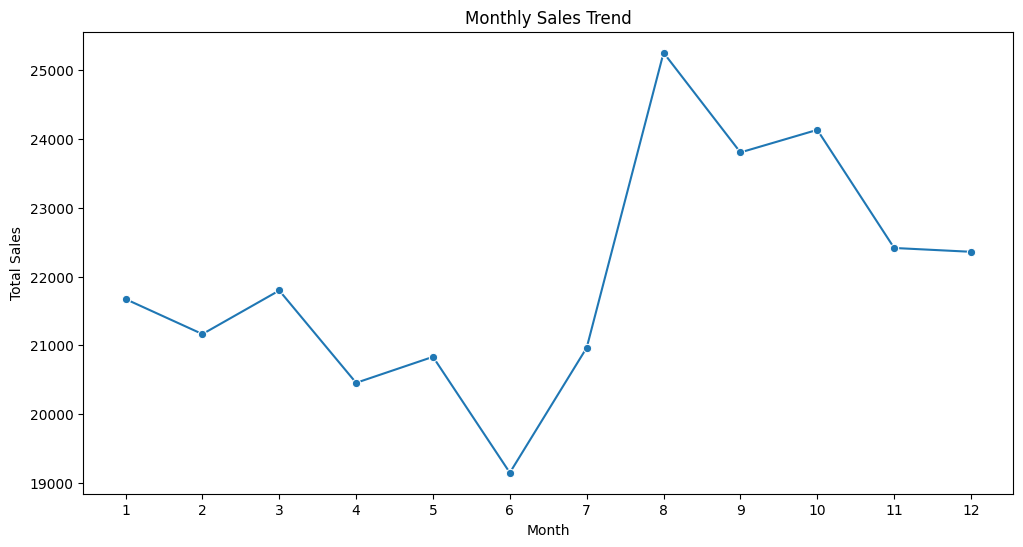

In [163]:
df['month'] = df['transaction_date'].dt.month

monthly_sales = df.groupby('month')['Total_Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Total_Price', data=monthly_sales, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(range(1, 13))
plt.show()

In [164]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

monthly_sales['month_name'] = monthly_sales['month'].map(month_names)
monthly_sales = monthly_sales.rename(columns={'month': 'month_number'})

In [165]:
pd.pivot_table(monthly_sales, index = 'month_name', values = 'Total_Price').reset_index()

,month_name,Total_Price
0,April,20455.85
1,August,25253.08
2,December,22360.04
3,February,21164.15
4,January,21673.10
5,July,20966.30
6,June,19149.55
7,March,21797.80
8,May,20833.70
9,November,22415.67


In [166]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9]:
        return 'Monsoon'
    elif month in [10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

monthly_sales['Season'] = monthly_sales['month_name'].apply(lambda x: assign_season(list(month_names.keys())[list(month_names.values()).index(x)]))
monthly_sales

,month_number,Total_Price,month_name,Season
0,1.0,21673.10,January,Winter
1,2.0,21164.15,February,Winter
2,3.0,21797.80,March,Summer
3,4.0,20455.85,April,Summer
4,5.0,20833.70,May,Summer
5,6.0,19149.55,June,Summer
6,7.0,20966.30,July,Monsoon
7,8.0,25253.08,August,Monsoon
8,9.0,23804.22,September,Monsoon
9,10.0,24132.21,October,Autumn


In [167]:
pd.pivot_table(monthly_sales, index = 'month_name', values = 'Total_Price').sort_values(by ='Total_Price', ascending = False ).reset_index()

,month_name,Total_Price
0,August,25253.08
1,October,24132.21
2,September,23804.22
3,November,22415.67
4,December,22360.04
5,March,21797.80
6,January,21673.10
7,February,21164.15
8,July,20966.30
9,May,20833.70


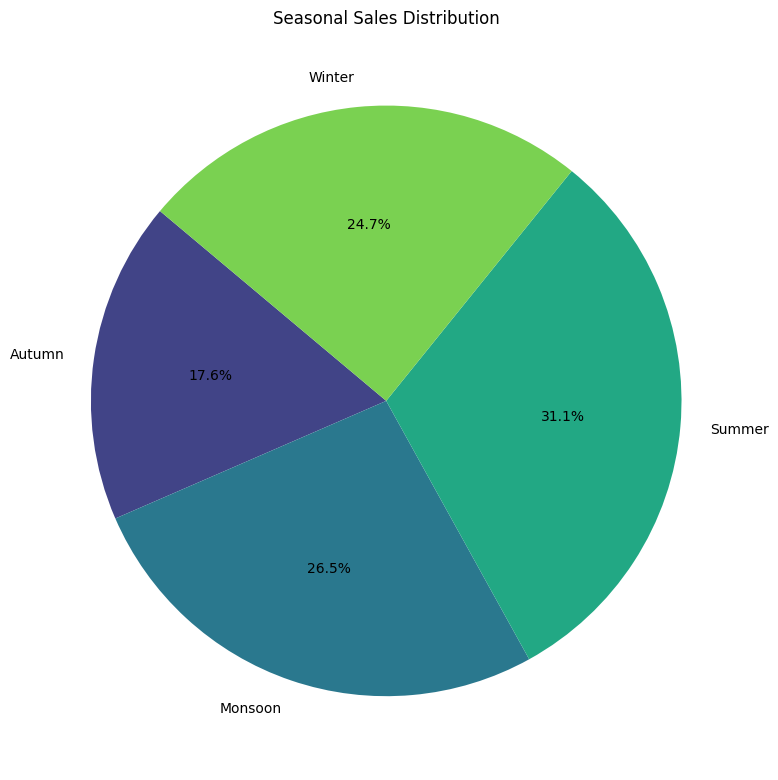

In [168]:
seasonal_sales = monthly_sales.groupby('Season')['Total_Price'].sum()

plt.figure(figsize=(8, 8))
plt.pie(seasonal_sales, labels=seasonal_sales.index,
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(seasonal_sales)))
plt.title('Seasonal Sales Distribution')
plt.tight_layout()
plt.show()

In [169]:
seasons_table = pd.pivot_table(monthly_sales, index = 'Season', values = 'Total_Price').reset_index()
seasons_table.index = list(range(1,seasons_table.shape[0]+1))
seasons_table

,Season,Total_Price
1,Autumn,23273.940
2,Monsoon,23341.200
3,Summer,20559.225
4,Winter,21732.430


**2. Pricing Strategy & Revenue Optimization**

How does unit price affect the quantity sold?


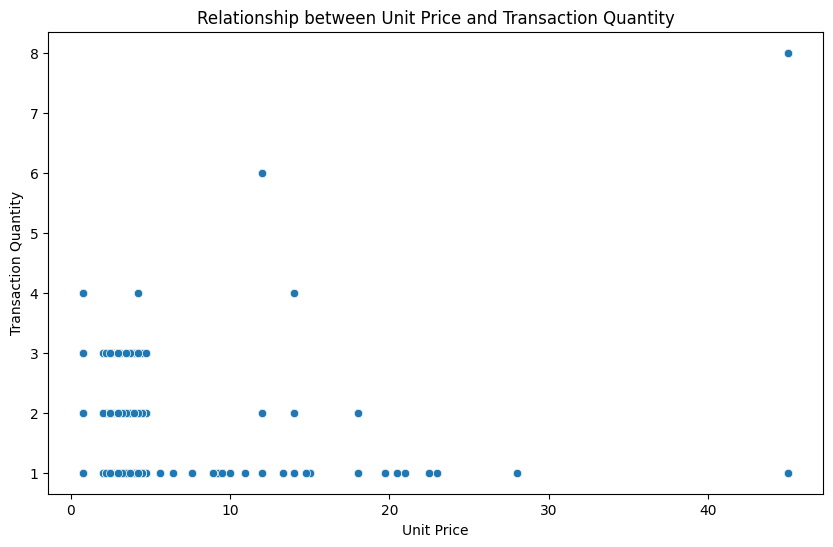

Correlation between Unit Price and Transaction Quantity: -0.12354566015198777


In [170]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='transaction_qty', data=df)
plt.xlabel('Unit Price')
plt.ylabel('Transaction Quantity')
plt.title('Relationship between Unit Price and Transaction Quantity')
plt.show()

correlation = df['unit_price'].corr(df['transaction_qty'])
print(f"Correlation between Unit Price and Transaction Quantity: {correlation}")


There is no coorelation between Transaction Quamntity and Unit price.

In [171]:
transact_table = pd.pivot_table(df, index = 'transaction_qty', values = 'unit_price').reset_index()
transact_table.index = list(range(1,transact_table.shape[0]+1))
transact_table

,transaction_qty,unit_price
1,1,3.699341
2,2,2.929041
3,3,2.930680
4,4,2.247826
5,6,12.000000
6,8,45.000000


What is the average price elasticity of demand for different products?


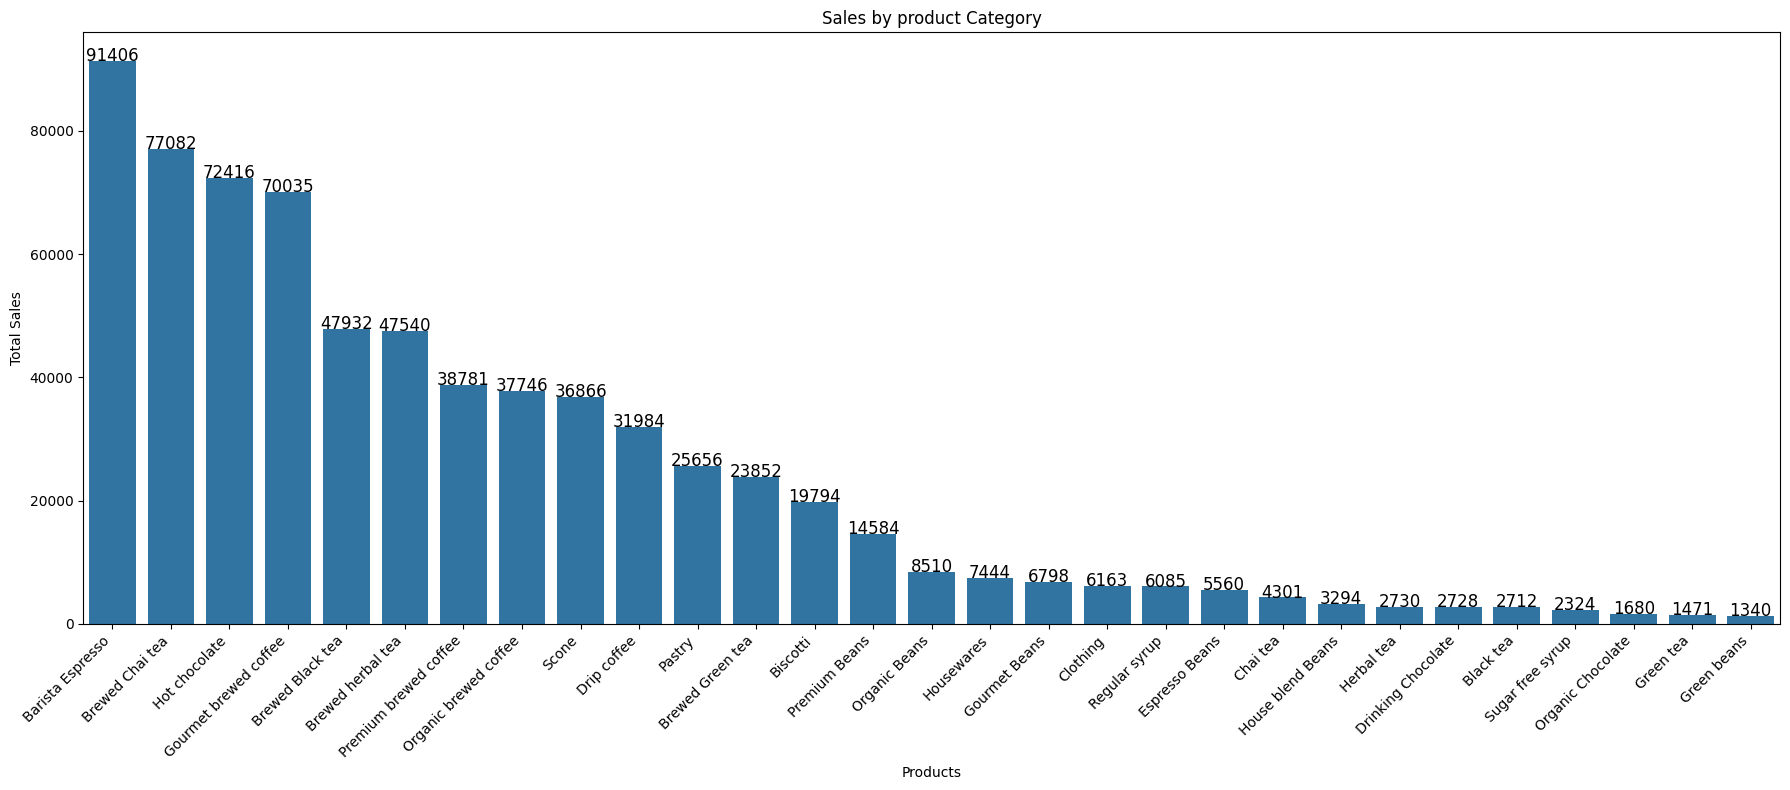

In [172]:
aggregated_sales = df.groupby(['product_type'])['Total_Price'].sum().reset_index().sort_values(by = 'Total_Price',ascending = False)

plt.figure(figsize=(18, 8))
sns.barplot(x='product_type', y='Total_Price', data=aggregated_sales)
plt.title('Sales by product Category')
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center_baseline',
                       fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

Are premium-priced products underperforming compared to budget-friendly items?

     product_category  Total_Price  unit_price  sales_per_unit_price
1        Coffee beans     40085.25   21.018397           1907.150671
2             Branded     13607.00   17.720214            767.880109
3           Loose Tea     11213.60    9.267438           1210.000000
4  Packaged Chocolate      4407.64    9.050595            487.000000
5  Drinking Chocolate     72416.00    4.148827          17454.571379
6              Bakery     82315.64    3.551682          23176.523946
7              Coffee    269952.45    3.023646          89280.443954
8                 Tea    196405.95    2.817121          69718.667708
9            Flavours      8408.80    0.800000          10511.000000


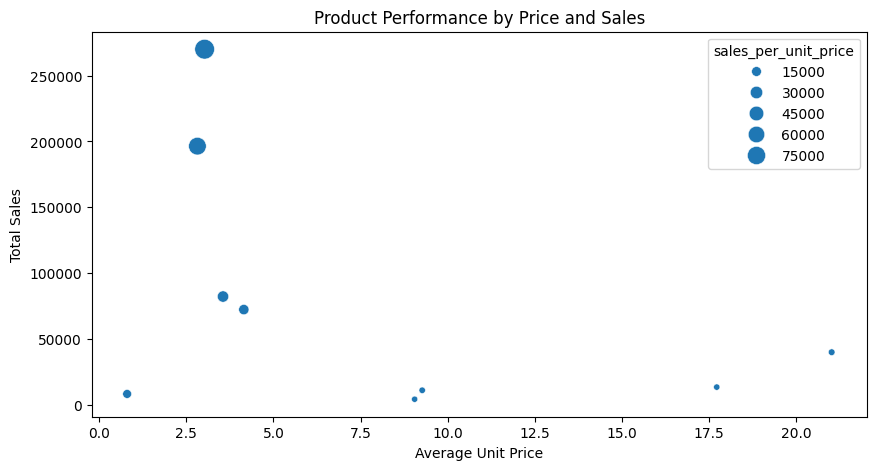

In [173]:
product_performance = df.groupby('product_category').agg({'Total_Price': 'sum', 'unit_price': 'mean'}).reset_index()
product_performance['sales_per_unit_price'] = product_performance['Total_Price'] / product_performance['unit_price']
product_performance = product_performance.sort_values('unit_price', ascending=False)
product_performance.index = list(range(1,product_performance.shape[0]+1))
print(product_performance)

plt.figure(figsize=(10, 5))
sns.scatterplot(x='unit_price', y='Total_Price', data=product_performance, size='sales_per_unit_price', sizes=(20, 200))
plt.xlabel('Average Unit Price')
plt.ylabel('Total Sales')
plt.title('Product Performance by Price and Sales')
plt.show()

**3. Customer Behavior Analysis**

Which product categories are most frequently purchased together? (Market Basket Analysis)


In [174]:
customer_frequency = df.groupby("transaction_id")["transaction_date"].count().reset_index()
customer_frequency.rename(columns={"transaction_date": "purchase_frequency"}, inplace=True)

# Create frequency segments
customer_frequency["frequency_segment"] = pd.cut(
    customer_frequency["purchase_frequency"],
    bins=3,
    labels=["Occasional", "Regular", "Frequent"]
)

# Crosstab for frequency segment vs total purchase amount
customer_spending = df.groupby("transaction_id")["Total_Price"].sum().reset_index()
customer_spending.rename(columns={"Total_Price": "total_spent"}, inplace=True)

# Merging spending and frequency data
customer_segments = pd.merge(customer_frequency, customer_spending, on="transaction_id", how="left")

# spending segments
customer_segments["spending_segment"] = pd.cut(
    customer_segments["total_spent"],
    bins=3,
    labels=["Low Spender", "Medium Spender", "High Spender"]
)

crosstab_segments = pd.crosstab(
    customer_segments["spending_segment"],
    customer_segments["frequency_segment"]
)


In [175]:
basket = df.groupby('product_type')[['transaction_qty','Total_Price']].sum().reset_index().sort_values(by ='transaction_qty',ascending = False)
basket.index = list(range(1,basket.shape[0]+1))
basket.head(5)

,product_type,transaction_qty,Total_Price
1,Brewed Chai tea,26250,77081.95
2,Gourmet brewed coffee,25973,70034.60
3,Barista Espresso,24943,91406.20
4,Brewed Black tea,17462,47932.00
5,Hot chocolate,17457,72416.00


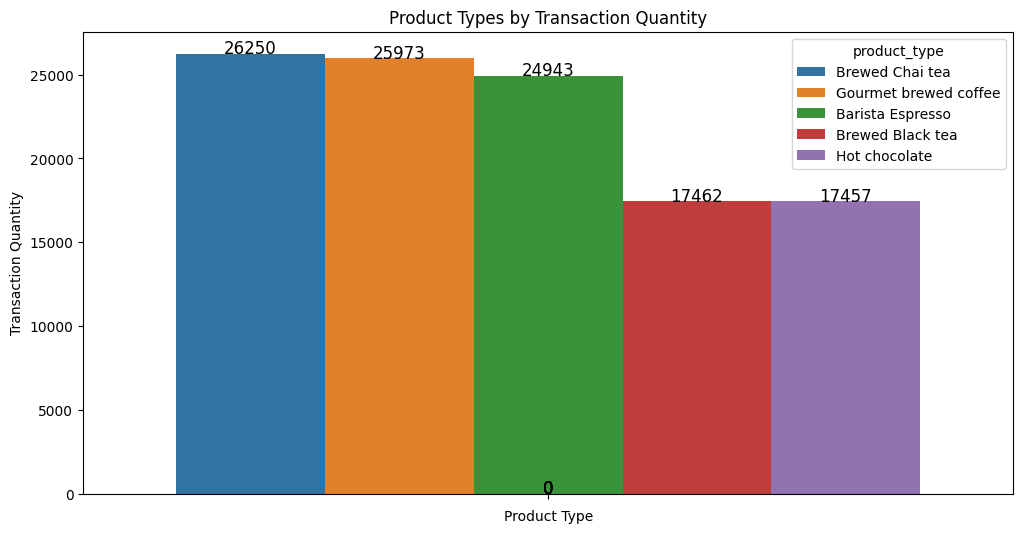

In [176]:
plt.figure(figsize=(12, 6))
sns.barplot(hue='product_type', y='transaction_qty', data=basket.head())
plt.xlabel('Product Type')
plt.ylabel('Transaction Quantity')
plt.title('Product Types by Transaction Quantity')
plt.xticks(rotation=45, ha='right')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center_baseline',
                       fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

Are there specific time slots where customers buy more premium items?


In [ ]:
hourly_prod_sales = df.groupby('hour')['Total_Price'].sum().reset_index().sort_values(by = 'Total_Price', ascending = False)
sns.lineplot(data=hourly_prod_sales, x="hour", y="Total_Price", marker="o", linewidth=2, color="green")
hourly_prod_sales

,hour,Total_Price
3083,11:18:31 AM,1474.40
25583,9:55:47 AM,1096.05
23493,9:05:20 AM,741.20
1736,10:41:11 AM,376.10
2208,10:52:37 AM,305.00
...,...,...
6807,1:25:53 PM,2.00
8041,2:09:24 PM,2.00
12454,4:40:28 PM,2.00
17374,7:03:00 PM,2.00


In [ ]:
product_transaction_counts = df.groupby('product_type')['transaction_id'].count().reset_index().sort_values(by = 'transaction_id',ascending = False)
product_transaction_counts.index = list(range(1,product_transaction_counts.shape[0]+1))
product_transaction_counts.head()


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(hue='product_type', y='transaction_id', data=product_transaction_counts.sort_values(by = 'transaction_id',ascending = False).head())
plt.xlabel('Product Type')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Product Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center_baseline',
                       fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

**4. Store Location Performance Analysis**


Which store locations have the highest/lowest revenue?


In [ ]:
store_revenue = df.groupby('store_location')['Total_Price'].sum()

# store with the highest revenue
highest_revenue_store = store_revenue.idxmax()
highest_revenue = store_revenue.max()

# store with the lowest revenue
lowest_revenue_store = store_revenue.idxmin()
lowest_revenue = store_revenue.min()

print(f"Store with highest revenue: {highest_revenue_store} (${highest_revenue:.2f})")
print(f"Store with lowest revenue: {lowest_revenue_store} (${lowest_revenue:.2f})")


Do different stores have different customer purchase behaviors?

In [ ]:
store_performance = df.groupby('store_location').agg({'Total_Price': 'sum', 'transaction_id': 'count'})
store_performance['Average_Transaction_Value'] = store_performance['Total_Price'] / store_performance['transaction_id']
print(store_performance)

plt.figure(figsize=(10, 6))
sns.barplot(x=store_performance.index, y='Average_Transaction_Value', data=store_performance)
plt.xlabel('Store Location')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value per Store Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 **5. Inventory & Waste Management**


Which products experience the highest stock wastage due to low demand?


In [ ]:
product_sales = df.groupby('product_category')['transaction_qty'].sum()
low_demand_products = product_sales[product_sales < product_sales.quantile(0.25)].reset_index()
print("Products with the highest stock wastage due to low demand:")
low_demand_products.index = list(range(1,low_demand_products.shape[0]+1))
low_demand_products

How much inventory should be stocked based on expected demand?


In [ ]:
average_weekly_sales = df.groupby(['product_category', 'week_number'])['transaction_qty'].sum().groupby('product_category').mean()

# Set a safety stock level (Ex: for 2 weeks of average sales). You might need to adjust this based on our business needs and product characteristics.
safety_stock = 2

# To Calculate the recommended inventory level.
recommended_inventory = (average_weekly_sales * safety_stock).astype(int).reset_index().sort_values(by ='transaction_qty', ascending = False )

print("Recommended Inventory Levels:")
recommended_inventory.index = list(range(1,recommended_inventory.shape[0]+1))
recommended_inventory


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(hue='product_category', y='transaction_qty', data=recommended_inventory.sort_values(by = 'transaction_qty',ascending = False).head())
plt.xlabel('Product Type')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Product Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center_baseline',
                       fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

**6. Marketing & Promotion Effectiveness**

How do discounts and promotions affect product sales?


In [ ]:
np.random.seed(42)
df['discount'] = np.random.choice([0, 0.1,0.15, 0.2], size=len(df)) # Simulating 0%, 10%, 15% or 20% discount

df['discounted_price'] = df['unit_price'] * (1 - df['discount'])
df['discounted_total_price'] = df['transaction_qty'] * df['discounted_price']

discount_sales = df.groupby('discount')['discounted_total_price'].sum().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='discount', y='discounted_total_price', data=discount_sales)
plt.xlabel('Discount Percentage')
plt.ylabel('Total Discounted Sales')
plt.title('Impact of Discounts on Total Sales')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center_baseline',
                       fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()
print(discount_sales)


In [ ]:
# Create a new column to categorize transactions
df['has_discount'] = df['discount'].apply(lambda x: 'With Discount' if x > 0 else 'Without Discount')

# Calculate average transaction value for each category
avg_transact_value = df.groupby('has_discount')['discounted_total_price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 7))
sns.barplot(x='has_discount', y='discounted_total_price', data=avg_transact_value, palette='flare')
plt.xlabel('Discount Category')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value: With vs Without Discount')

# Annotate bars with values
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom',
                       fontsize=12, color='black',
                       xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
print(avg_transact_value)

In [ ]:
highest_sales_discount = discount_sales.loc[discount_sales['discounted_total_price'].idxmax()]
print(f"Discount with highest total sales: {highest_sales_discount}")

In [ ]:
highest_avg_transaction_discount = avg_transact_value.loc[avg_transact_value['discounted_total_price'].idxmax()]
print(f"Discount with highest average transaction value: {highest_avg_transaction_discount}")


In [ ]:
# To Analyze average transaction value with and without discounts
avg_transact_value = df.groupby('discount')['discounted_total_price'].mean().reset_index()

# To Find out the discount level with the highest average transaction value
highest_avg_transaction_discount = avg_transact_value.loc[avg_transact_value['discounted_total_price'].idxmax()]
print(f"Discount with highest average transaction value: {highest_avg_transaction_discount}")

# ROI = (Increased Revenue - Discount Cost) / Discount Cost

***Hypothesis Testings***

1. Sales Difference Between Weekends and Weekdays
Question: Does the average sales revenue differ between weekends and weekdays?


In [ ]:
#H₀ (Null Hypothesis): There is no significant difference in average sales revenue between weekends and weekdays.
#Ha (Alternative Hypothesis): There is a significant difference in average sales revenue between weekends and weekdays.

import scipy.stats as stats

weekend_mask = df['weekday'].isin(['Saturday', 'Sunday'])

# Separation of sales data for weekends and weekdays
weekend_sales = df.loc[weekend_mask, 'Total_Price']
weekday_sales = df.loc[~weekend_mask, 'Total_Price']

# We Perform an independent samples t-test
t_statistic, p_value = stats.ttest_ind(weekend_sales, weekday_sales)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average sales revenue between weekends and weekdays.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average sales revenue between weekends and weekdays.")


2. Impact of Product Category on Sales


Does the average sales revenue differ across product categories?

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Total_Price ~ C(product_category)', data=df).fit()

# Anova
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis. There is a significant difference in average sales revenue across product categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average sales revenue across product categories.")

In [ ]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
m_comp = MultiComparison(df['Total_Price'], df['product_category'])
result = m_comp.tukeyhsd(alpha=0.05)
print(result)

3. Price Sensitivity Analysis


Does the average quantity sold change significantly based on price range?


In [ ]:
#H₀: There is no significant difference in quantity sold across different price ranges.
#Ha: There is a significant difference in quantity sold across different price ranges.

# Calculating the correlation between unit price and transaction quantity
correlation = df['unit_price'].corr(df['transaction_qty'])
print(f"Correlation between Unit Price and Transaction Quantity: {correlation}")

# Creation of price bins
price_bins = [0, 10, 20, 30, 40, float('inf')]  # Define appropriate price ranges
price_labels = ['0-10', '10-20', '20-30', '30-40', '40+']
df['price_range'] = pd.cut(df['unit_price'], bins=price_bins, labels=price_labels, right=False)

# Calculating average quantity sold per price range
avg_qty_by_price = df.groupby('price_range')['transaction_qty'].mean()
print(avg_qty_by_price)

# Performing Anova test
model = ols('transaction_qty ~ C(price_range)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
  print("Reject the null hypothesis. There is a statistically significant difference in average quantity sold across price ranges.")
else:
  print("Fail to reject the null hypothesis. There is no statistically significant difference in average quantity sold across price ranges.")

In [ ]:
# Post-hoc test (Tukey's HSD)
m_comp = MultiComparison(df['transaction_qty'], df['price_range'])
result = m_comp.tukeyhsd(alpha=0.05)
print(result)


4. Store Performance Comparison


Do different store locations have significantly different sales revenue?

In [ ]:
#H₀: There is no significant difference in sales revenue across different stores.
#Ha: There is a significant difference in sales revenue across different stores.

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Total_Price ~ C(store_location)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis. There is a significant difference in average sales revenue across store locations.")
    # Performing post-hoc test (Tukey's HSD) to identify which store locations differ significantly
    from statsmodels.sandbox.stats.multicomp import MultiComparison
    m_comp = MultiComparison(df['Total_Price'], df['store_location'])
    result = m_comp.tukeyhsd(alpha=0.05)
    print(result)
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average sales revenue across store locations.")


#Insights:



-The highests weekly sales was on week number 31.

-In weekdays Monday's, Wednesday & Friday had the most sales and on weekends Sunday had the moore number of the sales.

-Coffee & Tea was the most frequently product category sold.

-The highest montly sales were on Aug, Sep, Oct, Nov, Dec

-The Highest quantity were sold in Monson, Autumn & Winter Season.

-The products with most quantity sold were Barista Expresso, Brewed Chai tea, Hot chocolate,Gourmet brewed coffee, brewed black tea.

-The store location with the highest revenue is Hell's Kitchen.

-Products with the highest stock wastage due to low demand are Branded and Packaged Chocolate


#Recommendations:


*- Recommneded Inventory for the Coffee Store:*
*   Coffee, Tea, Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea.

*- Reduce the purcahse of Branded, packaged chocolate and sell it only on occassions.

*-  Discount do affect the product Sales with respect to 0%, 10%, 20%. Ideally 10% recommended to attract more customers.*

*-  On an average, we need to provide discounts or combo offers on these recommended products either on one of the weekdays or weekends.*

*-  Introduce different flavours on different locations ofr more visit.*

*- Coffee, Tea & Drinking Chocolate should be the most highlight on the menu with offers on specialb  occasions.*

*- Barista Espresso, Brewed Chai tea and Gourmet brewed coffee to be recommended more to professionals and elderly citizens to reduce type 2 diabetes and some cancers,as well as to improvr cognitive memory.